<a href="https://colab.research.google.com/github/JoseIng-EO/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [80]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [81]:
#Cálculo de ingresos por cada tienda
tienda1_ingresos = tienda['Precio'].sum()
tienda2_ingresos = tienda2['Precio'].sum()
tienda3_ingresos = tienda3['Precio'].sum()
tienda4_ingresos = tienda4['Precio'].sum()

#Imprimir los ingresos por tienda
print(f'La tienda N° 1 tuvo ingresos por: ${tienda1_ingresos}')
print(f'La tienda N° 2 tuvo ingresos por: ${tienda2_ingresos}')
print(f'La tienda N° 3 tuvo ingresos por: ${tienda3_ingresos}')
print(f'La tienda N° 4 tuvo ingresos por: ${tienda4_ingresos}')

La tienda N° 1 tuvo ingresos por: $1150880400.0
La tienda N° 2 tuvo ingresos por: $1116343500.0
La tienda N° 3 tuvo ingresos por: $1098019600.0
La tienda N° 4 tuvo ingresos por: $1038375700.0


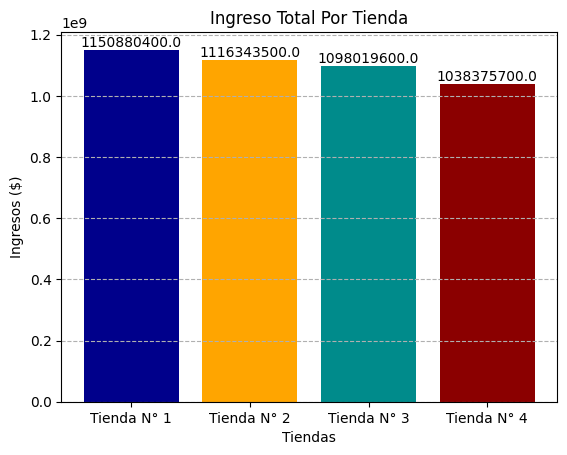

In [82]:
#Datos en tabla, título, eje x e y
tiendas = ['Tienda N° 1', 'Tienda N° 2', 'Tienda N° 3', 'Tienda N° 4']
tiendas_ingresos = [tienda1_ingresos, tienda2_ingresos, tienda3_ingresos, tienda4_ingresos]
plt.title('Ingreso Total Por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
colores = ['#00008b','#ffa500','#008b8b','#8b0000']
plt.grid(axis='y', linestyle = '--')

#Creación del gráfico de barras
barras = plt.bar(x=tiendas, height=tiendas_ingresos, color=colores)
#Valores sobre las barras
for barra in barras:
  yval = barra.get_height()
  plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 2. Ventas por categoría

In [83]:
total_ventas_categoria = {}
#Recorrer los DataFrames de las tiendas
for nombre, i in {'Tienda N° 1': tienda, 'Tienda N° 2': tienda2, 'Tienda N° 3': tienda3, 'Tienda N° 3': tienda4}.items():
  #Ventas por categoría de las tiendas
  cantidad = i['Categoría del Producto'].value_counts()
  total_ventas_categoria[nombre]=cantidad

In [84]:
#Contabilizar productos vendidos por categoría y tienda
ventas_tienda1 = tienda['Categoría del Producto'].value_counts()
ventas_tienda2 = tienda2['Categoría del Producto'].value_counts()
ventas_tienda3 = tienda3['Categoría del Producto'].value_counts()
ventas_tienda4 = tienda4['Categoría del Producto'].value_counts()

#Ventas por categoría y mostrar tabla
ventas_categoria = pd.DataFrame({
    'Tienda N° 1': ventas_tienda1,
    'Tienda N° 2': ventas_tienda2,
    'Tienda N° 3': ventas_tienda3,
    'Tienda N° 4': ventas_tienda4,
})
display(ventas_categoria)

,Tienda N° 1,Tienda N° 2,Tienda N° 3,Tienda N° 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


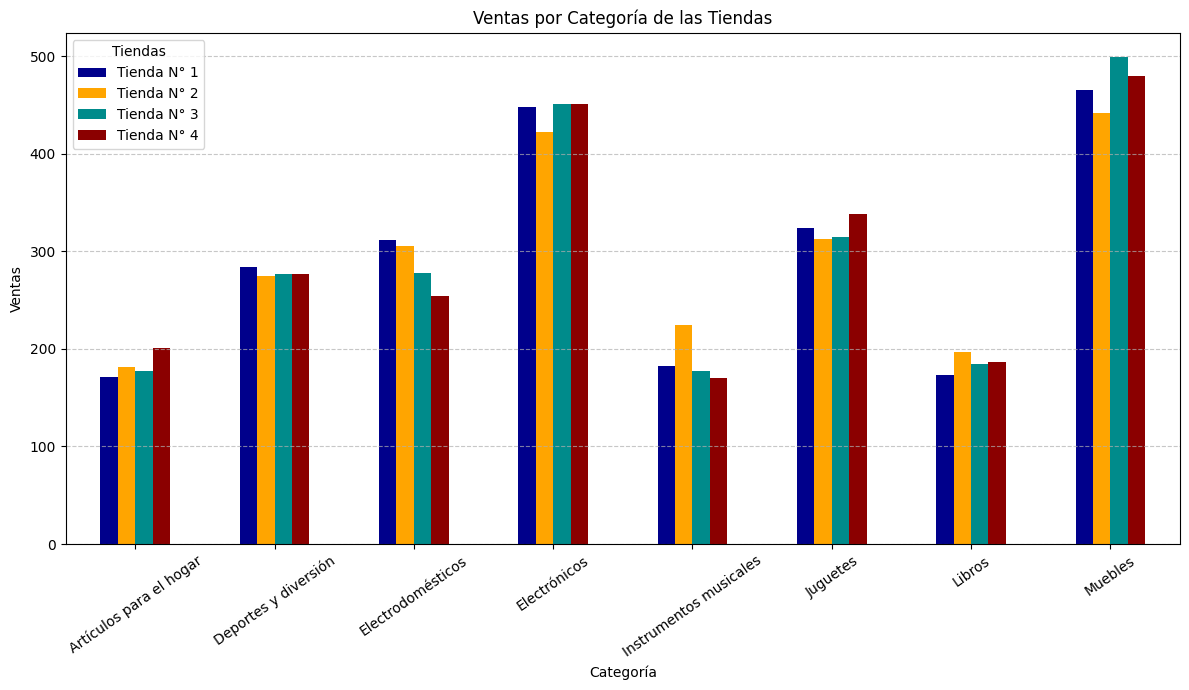

In [78]:
#Gráfico
colores = ['#00008b','#ffa500','#008b8b','#8b0000']
#barras agrupadas
ax = ventas_categoria.plot(kind='bar', figsize=(12,7), color=colores)
#Ejes
plt.title('Ventas por Categoría de las Tiendas')
plt.xlabel('Categoría')
plt.ylabel('Ventas')

# Etiquetas en el eje X
plt.xticks(rotation=35, ha='center')

# Título viñeta y líneas de serie
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [85]:
#Calificación promedio
calificacion_promedio1 = tienda['Calificación'].mean()
calificacion_promedio2 = tienda2['Calificación'].mean()
calificacion_promedio3 = tienda3['Calificación'].mean()
calificacion_promedio4 = tienda4['Calificación'].mean()
#Imprimir los resultados obtenidos
print(f'la calificación promedio de la Tienda N° 1 es: {calificacion_promedio1:.2f}')
print(f'la calificación promedio de la Tienda N° 2 es: {calificacion_promedio2:.2f}')
print(f'la calificación promedio de la Tienda N° 3 es: {calificacion_promedio3:.2f}')
print(f'la calificación promedio de la Tienda N° 4 es: {calificacion_promedio4:.2f}')

la calificación promedio de la Tienda N° 1 es: 3.98
la calificación promedio de la Tienda N° 2 es: 4.04
la calificación promedio de la Tienda N° 3 es: 4.05
la calificación promedio de la Tienda N° 4 es: 4.00


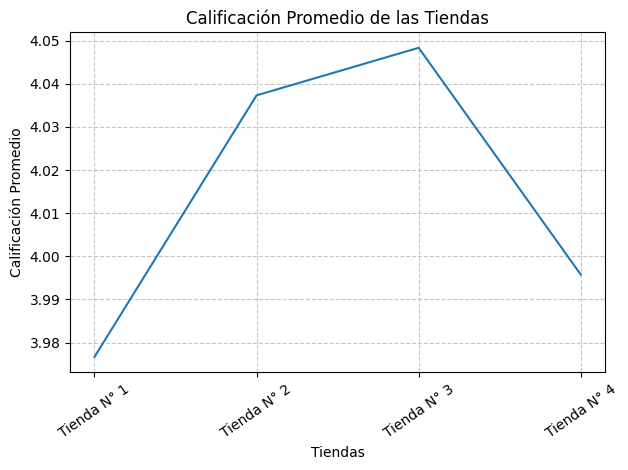

In [86]:
#Lista para el gráfico
calificacion_tiendas = [calificacion_promedio1, calificacion_promedio2, calificacion_promedio3, calificacion_promedio4]

#Gráfico
plt.plot(tiendas, calificacion_tiendas)
plt.title('Calificación Promedio de las Tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=35, ha='center')
plt.grid(axis='both', linestyle='--', alpha=0.7)

#Mostrar los valores de la calificación promedio
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

# Calculo Tienda N° 1


* Top productos más vendidos - Tienda 1
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56


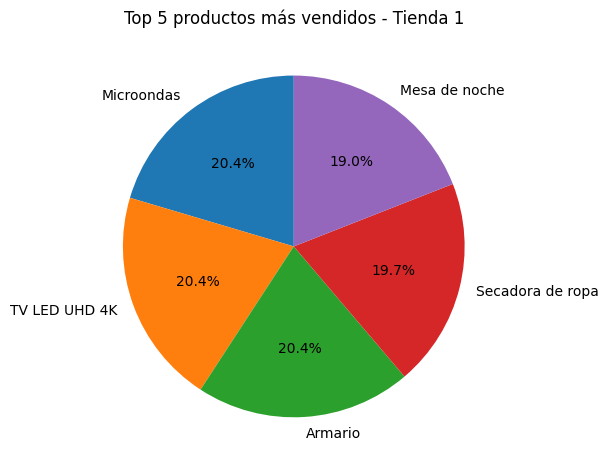

In [87]:
#Top 5 de los productos más vendidos en la Tienda N°1
tienda1_ventas = tienda["Producto"].value_counts()

print("* Top productos más vendidos - Tienda 1")
print("=======================================")
print(tienda1_ventas.head().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda1_ventas.head(5).plot(
    kind="pie",
    title="Top 5 productos más vendidos - Tienda 1",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

* Top productos menos vendidos - Tienda 1
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33


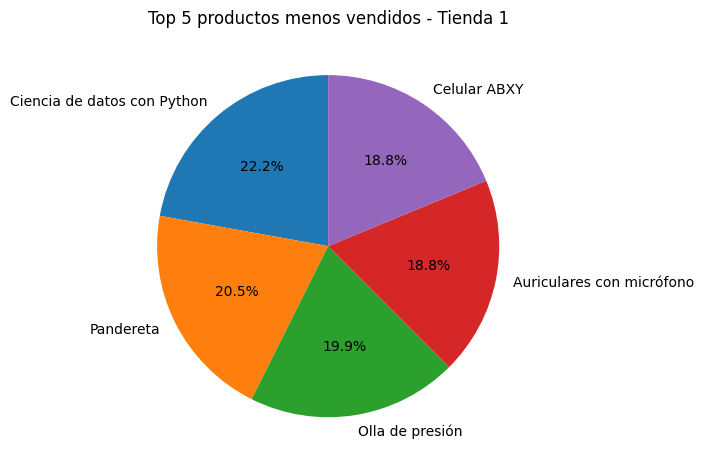

In [88]:
#Top 5 de los productos menos vendidos en la Tienda N°1
tienda1_ventas = tienda["Producto"].value_counts()

print("* Top productos menos vendidos - Tienda 1")
print("=======================================")
print(tienda1_ventas.tail().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda1_ventas.tail(5).plot(
    kind="pie",
    title="Top 5 productos menos vendidos - Tienda 1",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

# Cálculo Tienda N° 2

* Top productos más vendidos - Tienda 2
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58


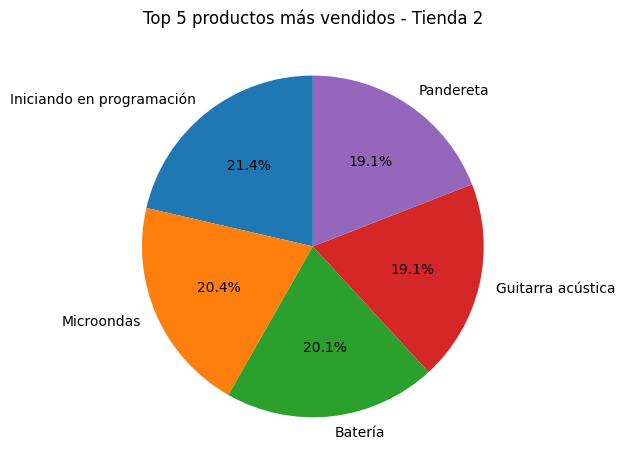

In [89]:
#Top 5 de los productos más vendidos en la Tienda N° 2
tienda2_ventas = tienda2["Producto"].value_counts()

print("* Top productos más vendidos - Tienda 2")
print("=======================================")
print(tienda2_ventas.head().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda2_ventas.head(5).plot(
    kind="pie",
    title="Top 5 productos más vendidos - Tienda 2",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

* Top productos menos vendidos - Tienda 2
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32


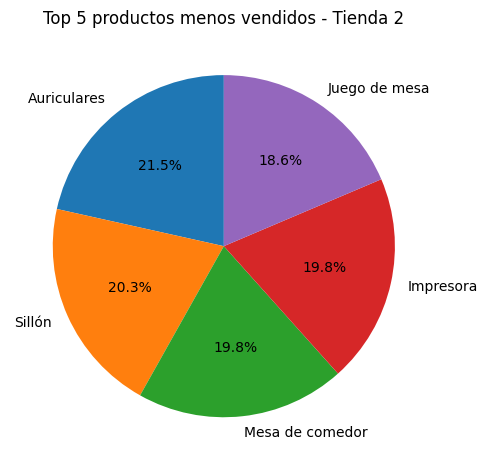

In [90]:
#Top 5 de los productos menos vendidos en la Tienda N°1
tienda2_ventas = tienda2["Producto"].value_counts()

print("* Top productos menos vendidos - Tienda 2")
print("=======================================")
print(tienda2_ventas.tail().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda2_ventas.tail(5).plot(
    kind="pie",
    title="Top 5 productos menos vendidos - Tienda 2",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

# Cálculo Tienda N° 3

* Top productos más vendidos - Tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55


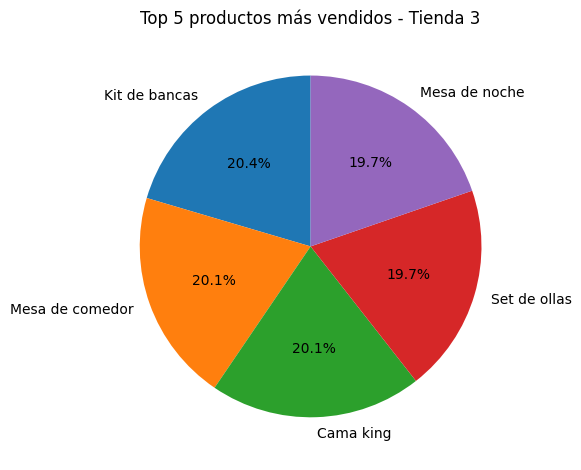

In [91]:
#Top 5 de los productos más vendidos en la Tienda N° 3
tienda3_ventas = tienda3["Producto"].value_counts()

print("* Top productos más vendidos - Tienda 3")
print("=======================================")
print(tienda3_ventas.head().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda3_ventas.head(5).plot(
    kind="pie",
    title="Top 5 productos más vendidos - Tienda 3",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

* Top productos menos vendidos - Tienda 3
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35


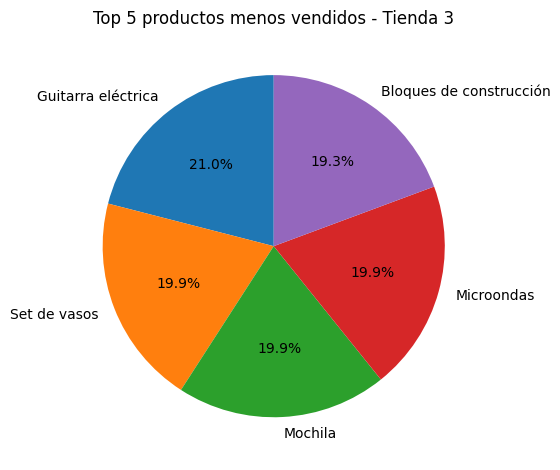

In [92]:
#Top 5 de los productos menos vendidos en la Tienda N° 3
tienda3_ventas = tienda3["Producto"].value_counts()

print("* Top productos menos vendidos - Tienda 3")
print("=======================================")
print(tienda3_ventas.tail().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda3_ventas.tail(5).plot(
    kind="pie",
    title="Top 5 productos menos vendidos - Tienda 3",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

* Top productos menos vendidos - Tienda 4
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33


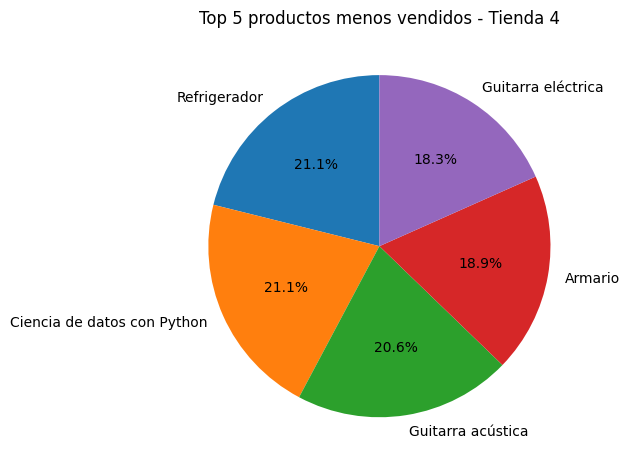

In [93]:
#Top 5 de los productos menos vendidos en la Tienda N° 3
tienda4_ventas = tienda4["Producto"].value_counts()

print("* Top productos menos vendidos - Tienda 4")
print("=======================================")
print(tienda4_ventas.tail().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda4_ventas.tail(5).plot(
    kind="pie",
    title="Top 5 productos menos vendidos - Tienda 4",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

# Cálculo Tienda N° 4

* Top productos más vendidos - Tienda 4
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55


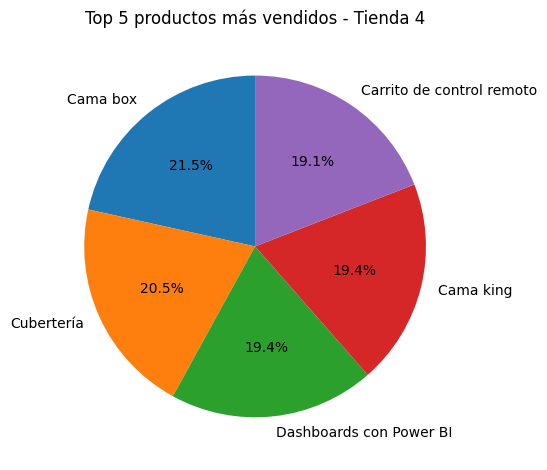

In [94]:
#Top 5 de los productos más vendidos en la Tienda N° 4
tienda4_ventas = tienda4["Producto"].value_counts()

print("* Top productos más vendidos - Tienda 4")
print("=======================================")
print(tienda4_ventas.head().to_string(name=False, dtype=False))
print("=======================================")

# Gráfico de barras horizontal
tienda4_ventas.head(5).plot(
    kind="pie",
    title="Top 5 productos más vendidos - Tienda 4",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel=''
)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [95]:
promedio_envio_t1 = tienda['Costo de envío'].mean()
promedio_envio_t2 = tienda2['Costo de envío'].mean()
promedio_envio_t3 = tienda3['Costo de envío'].mean()
promedio_envio_t4 = tienda4['Costo de envío'].mean()

#Imprimir los resultados
print(f"Envío promedio - Tienda 1: ${promedio_envio_t1:.2f}")
print(f"Envío promedio - Tienda 2: ${promedio_envio_t1:.2f}")
print(f"Envío promedio - Tienda 3: ${promedio_envio_t1:.2f}")
print(f"Envío promedio - Tienda 4: ${promedio_envio_t1:.2f}")

Envío promedio - Tienda 1: $26018.61
Envío promedio - Tienda 2: $26018.61
Envío promedio - Tienda 3: $26018.61
Envío promedio - Tienda 4: $26018.61


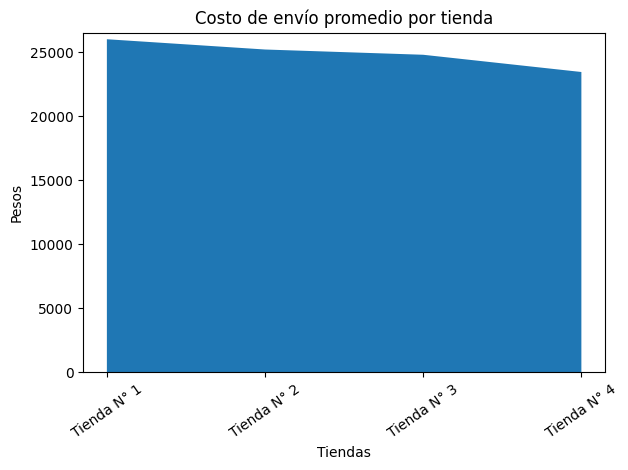

In [96]:
#Datos Gráfico
envios_promedios = [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4]
tiendas = ['Tienda N° 1', 'Tienda N° 2', 'Tienda N° 3', 'Tienda N° 4']

plt.stackplot(tiendas, envios_promedios)
plt.title("Costo de envío promedio por tienda")
plt.xticks(rotation=35, ha='center')
plt.ylabel("Pesos")
plt.xlabel("Tiendas")
plt.ylim(0, max(envios_promedios) + 500)
plt.tight_layout()
plt.show()